In [1]:
from spec_extract import *
from astropy.table import Table
import pandas as pd
from glob import glob
from spec_tools import Source_present
from grizli import multifit
import matplotlib.pyplot as plt
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

if hpath == '/Users/Vince.ec/':
    dpath = '/Volumes/Vince_research/Data/' 
    
else:
    dpath = hpath + 'Data/' 


In [2]:
gsd_cat = pd.read_pickle('../dataframes/clear_q_gsd.pkl')
gnd_cat = pd.read_pickle('../dataframes/clear_q_gnd.pkl')

In [3]:
sids = []
sfld = []
for i in gsd_cat.index:
    sids.append(gsd_cat.id[i])
    sfld.append(str(gsd_cat.grism_id_x[i])[2:].split('-')[0])

In [4]:
gsd_fields = ['ERSPRIME', 'GS1', 'GS2', 'GS3', 'GS4', 'GS5']
gnd_fields = ['GN1', 'GN2', 'GN3', 'GN4', 'GN5', 'GN7']

In [5]:
field = 'GSD'
skipped = []
for i in range(len(gsd_fields)):
    grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/{0}/*GrismFLT.fits'.format(gsd_fields[i])))
    for ii in range(len(sfld)):
        if sfld[ii] == gsd_fields[i]:
            try:
                ex = Extract_all(sids[ii], field, grp)
#                 ex.Phot_save()
                ex.Extract_spec()
#                 ex.Extract_BeamCutout()
            except:
                skipped.append(sids[ii])

Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12iaq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12ihq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12ioq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12ivq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23sxq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23t4q.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23tbq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23tiq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19o6q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19o7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19oaq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19ocq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20f7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20f8q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20fbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20fdq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt21b7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt21b8q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt21bcq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt21beq.01.GrismFL

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1200: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2948: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  out = np.linalg.lstsq(A.T,y)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/Vince.ec/GitHub/C

Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01ixq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01iqq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01j4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01jbq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07dxq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07dzq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07e2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07e4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08e7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08e9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08ecq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08eeq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt09f0q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt09f2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt09f5q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt09f7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt10dbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/i

In [6]:
skipped

[43114, 43683, 44725]

In [7]:
nids = []
nfld = []
for i in gnd_cat.index:
    nids.append(gnd_cat.id[i])
    nfld.append(str(gnd_cat.grism_id_x[i])[2:].split('-')[0])

In [8]:
field = 'GND'
skipped = []
for i in range(len(gnd_fields)):
    grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/{0}/*GrismFLT.fits'.format(gnd_fields[i])))
    for ii in range(len(nfld)):
        if nfld[ii] == gnd_fields[i]:
            try:
                ex = Extract_all(nids[ii], field, grp)
#                 ex.Phot_save()
                ex.Extract_spec()
#                 ex.Extract_BeamCutout()
            except:
                skipped.append(nids[ii])

Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720fgq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720f4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720fkq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720f0q.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tdq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tpq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tuq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46swq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46sxq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46t0q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46t2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xcq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xfq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xhq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt48mgq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/i

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1200: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2948: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  out = np.linalg.lstsq(A.T,y)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/Vince.ec/GitHub/C

Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708ipq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708ilq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708i5q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708i9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712lkq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712lyq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712maq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712meq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721xiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721xmq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721xyq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721y2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/i

In [9]:
skipped

[37922, 38235, 36672]

In [10]:
ex_gsd_cat = pd.read_pickle('../dataframes/extra_q_gsd.pkl')
ex_gnd_cat = pd.read_pickle('../dataframes/extra_q_gnd.pkl')

In [11]:
xsids = []
xsfld = []
for i in ex_gsd_cat.index:
    for ii in ex_gsd_cat.fields[i]:
        xsids.append(ex_gsd_cat.gids[i])
        xsfld.append(ii)

In [12]:
field = 'GSD'
skipped = []
for i in range(len(gsd_fields)):
    grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/{0}/*GrismFLT.fits'.format(gsd_fields[i])))
    for ii in range(len(xsfld)):
        mod = 'none'
        if xsfld[ii] == gsd_fields[i]:
            if os.path.isfile('../spec_files/GSD_{0}_g102.npy'.format(xsids[ii])):
                mod = 2
            try:
                ex = Extract_all(xsids[ii], field, grp,spec_name_mod = mod)
#                 ex.Phot_save()
                ex.Extract_spec()
#                 ex.Extract_BeamCutout()
            except:
                skipped.append(xsids[ii])

Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12iaq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12ioq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12ihq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj12ivq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23sxq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23t4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23tbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/ibhj23tiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19o6q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19o7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19oaq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt19ocq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20f7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20f8q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20fbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt20fdq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/ERSPRIME/icxt21b7q.01.GrismFL

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1200: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2948: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  out = np.linalg.lstsq(A.T,y)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/Vince.ec/GitHub/C

Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01iqq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01jbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01j4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/ibhj01ixq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07dxq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07dzq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07e2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt07e4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08e7q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08e9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08ecq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/icxt08eeq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS1/i

/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:213: RuntimeWarning: invalid value encountered in true_divide
  Rflx = g141['flux'] / g141['flat']
/Users/Vince.ec/GitHub/Cluster_and_field/scripts/spec_extract.py:214: RuntimeWarning: invalid value encountered in true_divide
  Rerr = g141['err'] / g141['flat']


Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj03xoq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj03y2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj03xvq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj03y9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj11hiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj11hpq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj11hwq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj11i3q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj35vuq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj35w1q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj35w8q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/ibhj35wfq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS2/i

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2347: RuntimeWarning: divide by zero encountered in double_scalars
  var_bin[j] = 1./den[ix].sum()
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2348: RuntimeWarning: invalid value encountered in double_scalars
  flux_bin[j] = num[ix].sum()*var_bin[j]


Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj30c6q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj30ckq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj30cdq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj30bzq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj35vuq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj35w1q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj35w8q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/ibhj35wfq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/icxt13gfq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/icxt13ghq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/icxt13gkq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/icxt13gmq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS5/i

In [13]:
skipped

[42586, 20403, 22640, 29199, 36176, 36315]

In [15]:
xnids = []
xnfld = []
for i in ex_gnd_cat.index:
    for ii in ex_gnd_cat.fields[i]:
        if ii[1] != 'D':
            xnids.append(ex_gnd_cat.gids[i])
            xnfld.append(ii)

In [16]:
field = 'GND'
skipped = []
for i in range(len(gnd_fields)):
    grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/{0}/*GrismFLT.fits'.format(gnd_fields[i])))
    for ii in range(len(xnfld)):
        if xnfld[ii] == gnd_fields[i]:
            mod = 'none'
            if os.path.isfile('../spec_files/GND_{0}_g102.npy'.format(xnids[ii])):
                mod = 2
            try:
                ex = Extract_all(xnids[ii], field, grp, spec_name_mod = mod)
#                 ex.Phot_save()
                ex.Extract_spec()
#                 ex.Extract_BeamCutout()
            except:
                skipped.append(xnids[ii])

Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720fgq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720fkq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720f4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/ib3720f0q.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tdq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tpq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icat20tuq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46swq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46sxq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46t0q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt46t2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xcq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xfq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt47xhq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/icxt48mgq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN1/i

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1200: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2948: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  out = np.linalg.lstsq(A.T,y)
/Users/Vince.ec/minic

Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708ilq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708i5q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708ipq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3708i9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712lkq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712lyq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712maq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3712meq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721xiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721xmq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721xyq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/ib3721y2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN2/i

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2413: RuntimeWarning: divide by zero encountered in true_divide
  self.weighted_sigma2_mask = 1/(self.weightf*self.sivarf**2)[self.fit_mask]
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2413: RuntimeWarning: overflow encountered in true_divide
  self.weighted_sigma2_mask = 1/(self.weightf*self.sivarf**2)[self.fit_mask]


Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3706b2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3706b6q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3706biq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3706bpq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3707caq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3707ceq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3707cqq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3707cuq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3708i5q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3708i9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3708ilq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/ib3708ipq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GN7/i

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2347: RuntimeWarning: divide by zero encountered in double_scalars
  var_bin[j] = 1./den[ix].sum()
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2348: RuntimeWarning: invalid value encountered in double_scalars
  flux_bin[j] = num[ix].sum()*var_bin[j]


In [17]:
skipped

[38103, 38136, 38142, 38250, 35007, 35128, 35399]

In [18]:
ls ../spec_files/*_2_g102*

../spec_files/GND_18333_2_g102.npy  ../spec_files/GND_35175_2_g102.npy
../spec_files/GND_21516_2_g102.npy


remove 18333_2
remove 21516_2

(-1e-18, 2e-18)

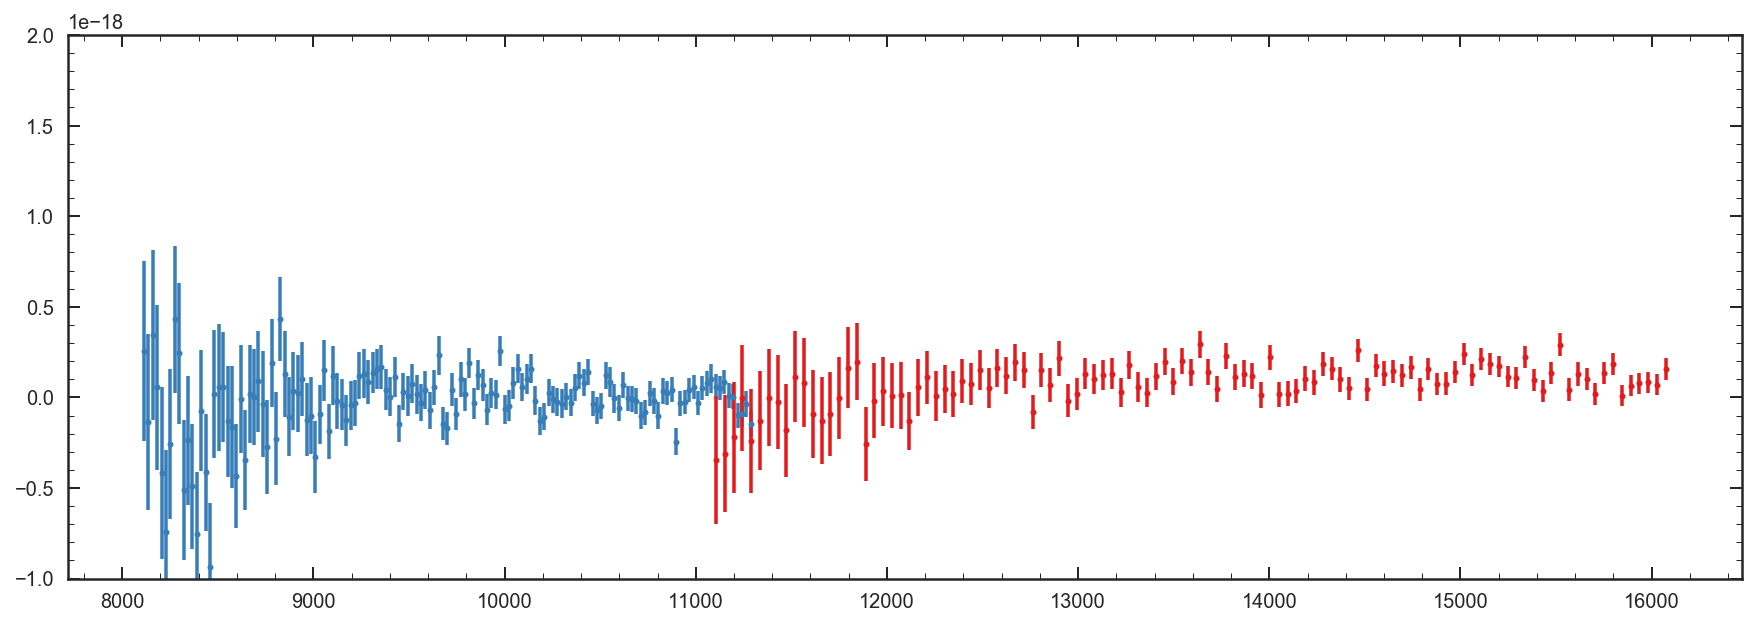

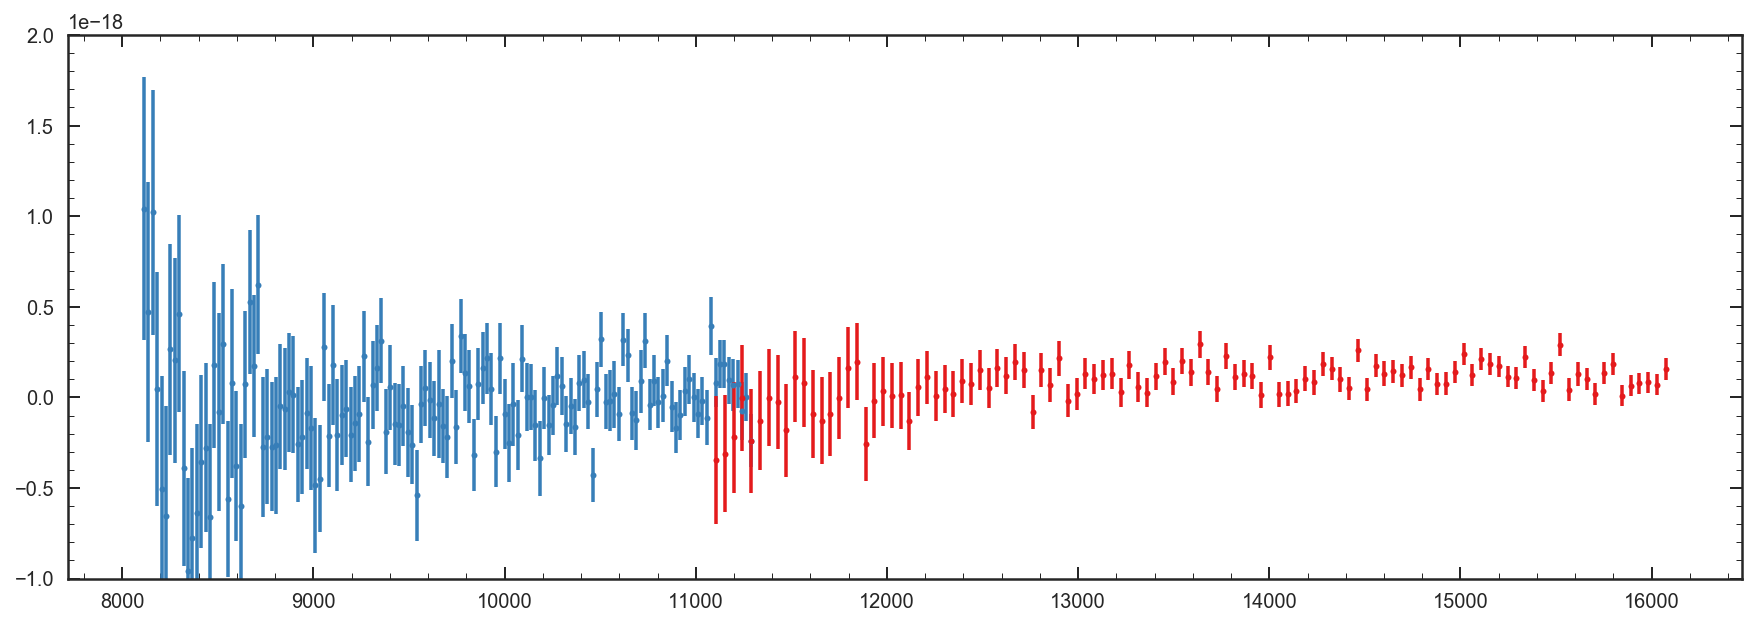

In [33]:
Bwv, Bflx, Berr, Bflt = np.load('../spec_files/GND_35175_g102.npy')
Rwv, Rflx, Rerr, Rflt = np.load('../spec_files/GND_35175_g141.npy')

IDB = [U for U in range(len(Bwv)) if 8100 < Bwv[U] < 11300]
IDR = [U for U in range(len(Rwv)) if 11100 < Rwv[U] < 16100]

plt.figure(figsize=[15,5])
plt.errorbar(Bwv[IDB],Bflx[IDB],Berr[IDB],
            linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(Rwv[IDR],Rflx[IDR],Rerr[IDR],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,2E-18)
Bwv2, Bflx2, Berr2, Bflt2 = np.load('../spec_files/GND_35175_2_g102.npy')
Rwv2, Rflx2, Rerr2, Rflt2 = np.load('../spec_files/GND_35175_2_g141.npy')

IDB2 = [U for U in range(len(Bwv2)) if 8100 < Bwv2[U] < 11300]
IDR2 = [U for U in range(len(Rwv2)) if 11100 < Rwv2[U] < 16100]

plt.figure(figsize=[15,5])
plt.errorbar(Bwv2[IDB2],Bflx2[IDB2],Berr2[IDB2],
            linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(Rwv2[IDR2],Rflx2[IDR2],Rerr2[IDR2],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,2E-18)

In [34]:
Bstk,Bster = Stack(Bwv[Bflx2**2>0], [Bflx[Bflx2**2>0],Bflx2[Bflx2**2>0]],[Berr[Bflx2**2>0], Berr2[Bflx2**2>0] ])
Rstk,Rster = Stack(Rwv[Rflx2**2>0], [Rflx[Rflx2**2>0],Rflx2[Rflx2**2>0]],[Rerr[Rflx2**2>0], Rerr2[Rflx2**2>0] ])

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [28]:
def Stack(wv,flgrid,errgrid):

    flgrid = np.transpose(flgrid)
    errgrid = np.transpose(errgrid)
    weigrid = errgrid ** (-2)
    infmask = np.isinf(weigrid)
    weigrid[infmask] = 0
    ################

    stack, err = np.zeros([2, len(wv)])
    for i in range(len(wv)):
        stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / (np.sum(weigrid[i]))
        err[i] = 1 / np.sqrt(np.sum(weigrid[i]))
    
    return stack, err

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


(-1e-18, 2e-18)

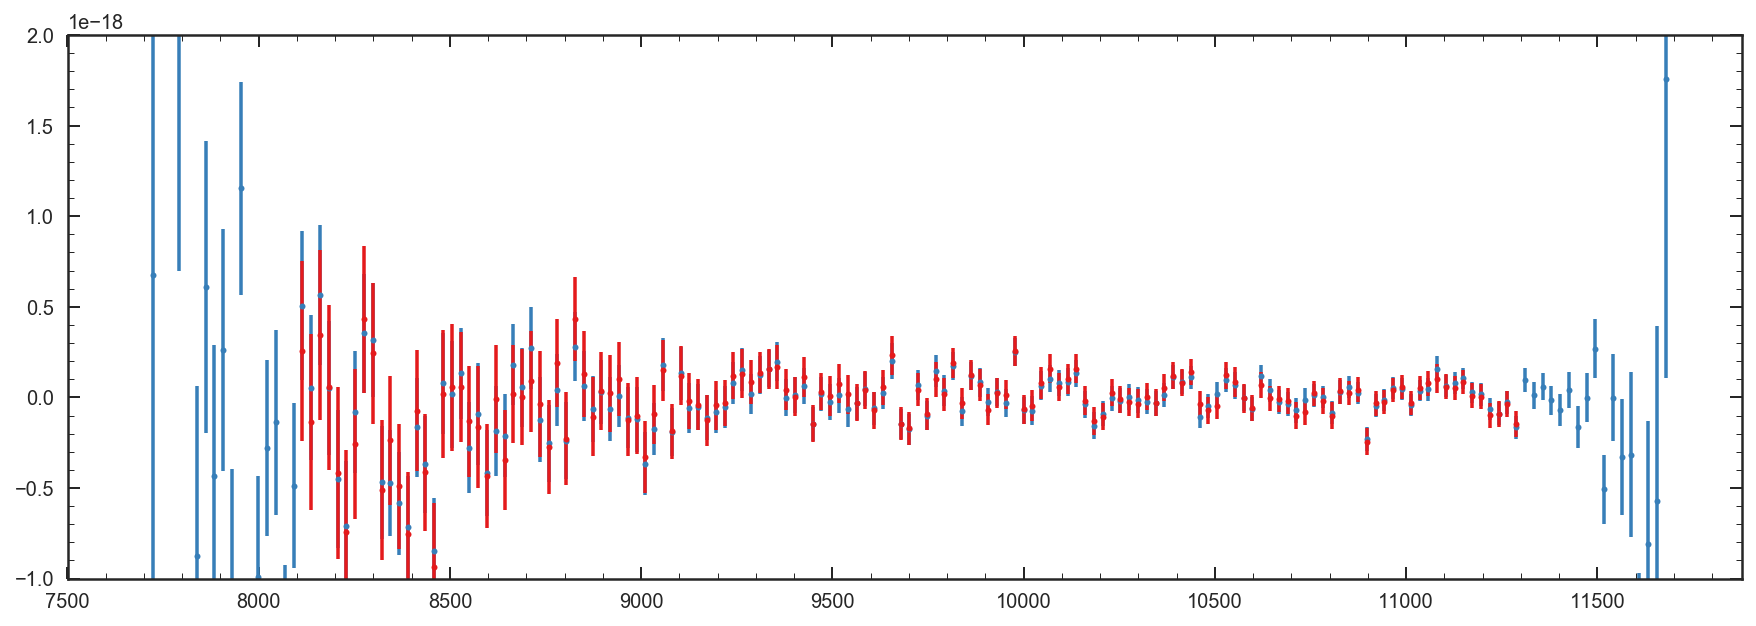

In [35]:
plt.figure(figsize=[15,5])
plt.errorbar(Bwv[Bflx2**2>0],Bstk,Bster,
            linestyle='None', marker='o', markersize=3, color='#377eb8')

plt.errorbar(Bwv[IDB],Bflx[IDB],Berr[IDB],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,2E-18)

(-1e-18, 1.5e-18)

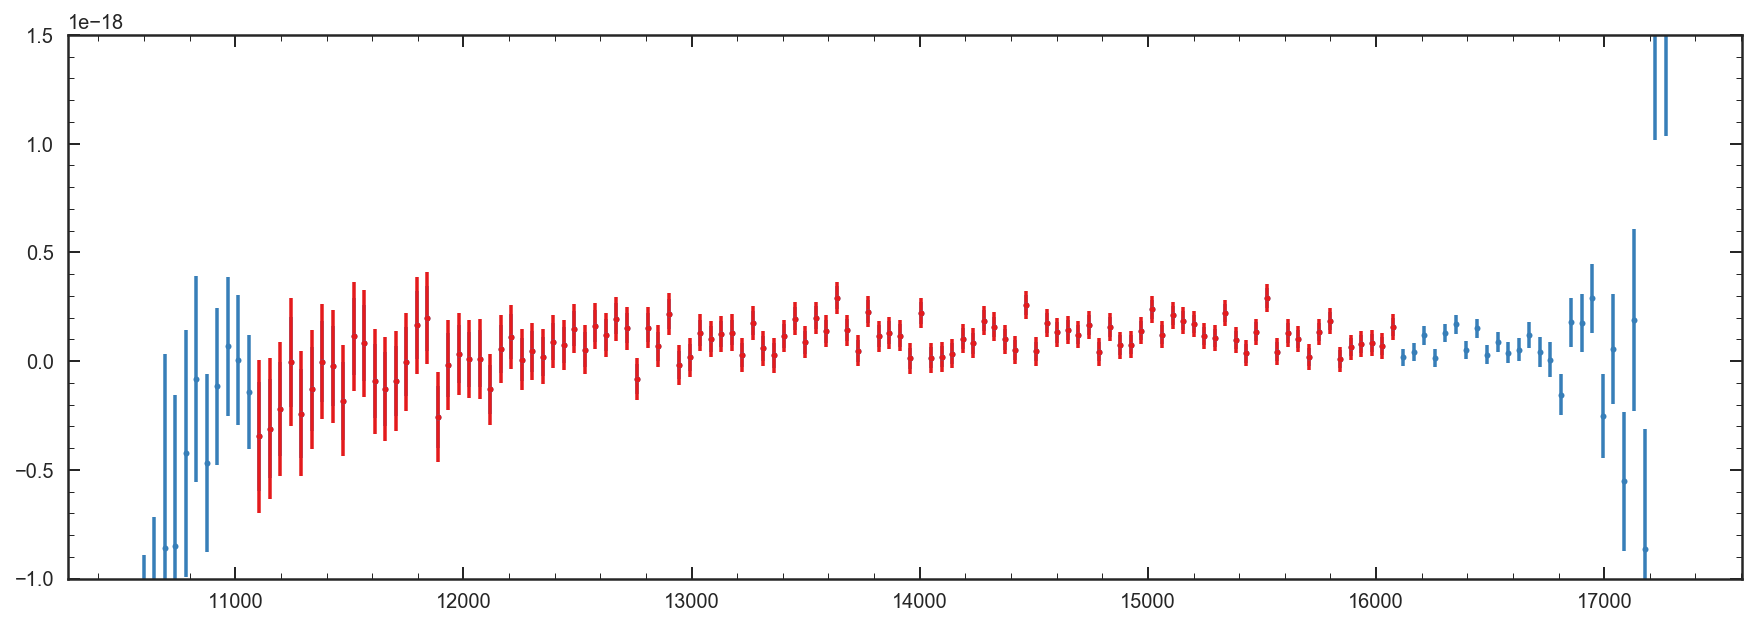

In [36]:
plt.figure(figsize=[15,5])
plt.errorbar(Rwv[Rflx2**2>0],Rstk,Rster,
            linestyle='None', marker='o', markersize=3, color='#377eb8')

plt.errorbar(Rwv[IDR],Rflx[IDR],Rerr[IDR],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.ylim(-1E-18,1.5E-18)

In [37]:
np.save('../spec_files/GND_35175_g102', [Bwv[Bflx2**2>0],Bstk,Bster, Bflt[Bflx2**2>0]])
np.save('../spec_files/GND_35175_g141', [Rwv[Rflx2**2>0],Rstk,Rster, Rflt[Rflx2**2>0]])

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


# rescale 

rescale ../spec_files/GND_18333
rescale ../spec_files/GND_21516
rescale ../spec_files/GND_35175
rescale ../spec_files/GSD_40623
rescale ../spec_files/GSD_41148

In [48]:
gsd_cat

,phot_id_x,grism_id_x,jh_mag_x,z_spec_x,z_peak_phot,z_phot_l95,z_phot_l68,z_phot_u68,z_phot_u95,z_max_grism_x,...,n_271,L272,n_272,L273,n_273,L274,n_274,L275,n_275,UVJ
139,26272,b'GS4-G102_26272',22.751,-1.000,1.5313,1.430,1.478,1.586,1.642,1.5434,...,28,0.128131,28,0.268388,28,0.305359,28,8.30583,6,Q
680,29257,b'GS4-G102_29257',23.318,-1.000,1.6039,1.430,1.544,1.661,1.724,1.6393,...,28,0.201705,28,0.314958,29,0.339811,31,5.71485,6,Q
903,36095,b'GS3-G102_36095',21.417,-1.000,1.9536,1.888,1.920,1.987,2.015,1.9476,...,28,1.353240,28,2.074530,31,2.204460,32,38.10630,8,Q
359,38843,b'GS5-G102_38843',22.964,-1.000,1.6311,1.543,1.579,1.686,1.721,1.5294,...,28,0.167982,28,0.391517,29,0.450130,31,8.31035,6,Q
1602,39012,b'ERSPRIME-G102_39012',22.311,-1.000,1.5764,1.508,1.539,1.611,1.652,1.6117,...,28,0.103990,28,0.272681,28,0.314029,31,14.71080,6,Q
1683,39364,b'ERSPRIME-G102_39364',21.299,-1.000,1.6535,1.591,1.616,1.692,1.716,1.6078,...,28,1.177750,28,2.190460,30,2.447330,31,37.69070,6,Q
303,40223,b'GS5-G102_40223',22.548,-1.000,1.6111,1.558,1.581,1.642,1.665,1.5922,...,28,0.179707,28,0.417178,28,0.486177,31,12.22330,6,Q
958,41520,b'GS3-G102_41520',22.013,-1.000,1.6205,1.579,1.596,1.646,1.664,1.6039,...,28,0.214825,28,0.554250,28,0.649462,29,20.06920,6,Q
693,41886,b'GS5-G102_41886',22.800,2.090,2.1359,2.089,2.107,2.165,2.192,2.0603,...,28,0.948473,31,1.297600,32,1.398940,32,14.28800,8,Q
97,42113,b'GS3-G102_42113',21.427,-1.000,1.6176,1.577,1.593,1.642,1.664,1.6130,...,28,0.325174,28,0.885000,28,1.017520,31,33.78070,6,Q


<ErrorbarContainer object of 3 artists>

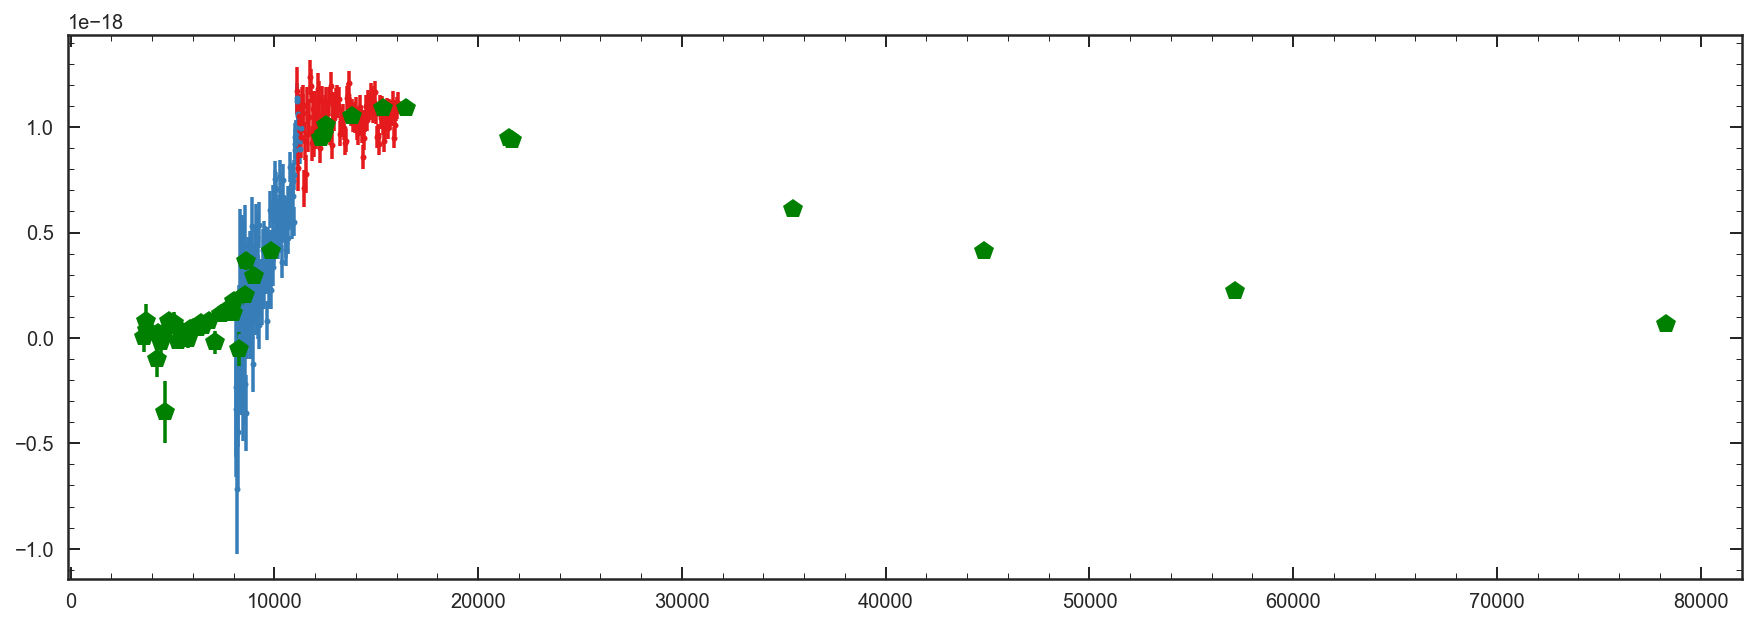

In [254]:
Bwv, Bflx, Berr, Bflt = np.load('../spec_files/GSD_41148_g102.npy')
Rwv, Rflx, Rerr, Rflt = np.load('../spec_files/GSD_41148_g141.npy')
Pwv, Pflx, Perr, Pnum = np.load('../phot/GSD_41148_phot.npy')

IDB = [U for U in range(len(Bwv)) if 8100 < Bwv[U] < 11300]
IDR = [U for U in range(len(Rwv)) if 11100 < Rwv[U] < 16100]

plt.figure(figsize=[15,5])
plt.errorbar(Bwv[IDB],Bflx[IDB],Berr[IDB],
            linestyle='None', marker='o', markersize=3, color='#377eb8')
plt.errorbar(Rwv[IDR],Rflx[IDR],Rerr[IDR],
            linestyle='None', marker='o', markersize=3, color='#e41a1c')
plt.errorbar(Pwv, Pflx, Perr,
            linestyle='None', marker='p', markersize=10, color='G')
# plt.xlim(5000,20000)

In [39]:
field = 'GSD'
grp = multifit.GroupFLT(grism_files = glob(dpath + 'Grism_fields/GS4/*GrismFLT.fits'))

Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj07ynq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj07z1q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj07yuq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj07ygq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj32qvq.01.GrismFLT.fits!


Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj32r2q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj32r9q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj32rgq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj34h8q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj34hiq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj34huq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj34i1q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj36huq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj36i4q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj36j3q.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj36jbq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/ibhj37uaq.01.GrismFLT.fits!
Load /Volumes/Vince_research/Data/Grism_fields/GS4/i

In [46]:
ex = Extract_all(28070, 'GSD', grp)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


In [47]:
ex.Phot_save()
ex.Extract_spec()
ex.Extract_BeamCutout()

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1200: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2948: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  out = np.linalg.lstsq(A.T,y)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3393: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/Vince.ec/minic

In [24]:
mb = multifit.MultiBeam(ex.beams,fcontam=1.0)

/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1200: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:2948: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  out = np.linalg.lstsq(A.T,y)


/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/fitting.py:2169: RuntimeWarning: invalid value encountered in greater
  clip &= (er > 0)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:594: RuntimeWarning: invalid value encountered in true_divide
  opt_flux = num.sum(axis=0)/den.sum(axis=0)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:595: RuntimeWarning: divide by zero encountered in true_divide
  opt_var = 1./den.sum(axis=0)
/Users/Vince.ec/miniconda3/envs/astroconda/lib/p

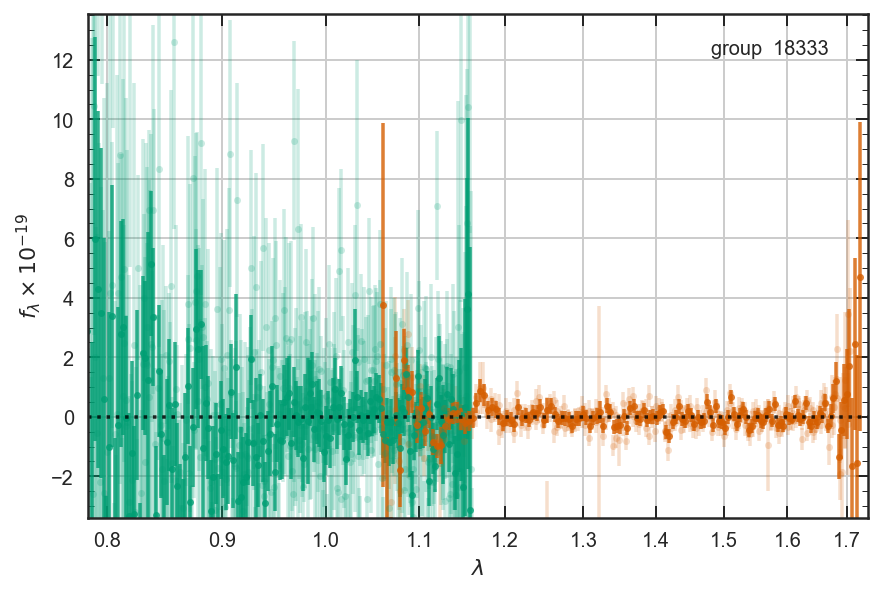

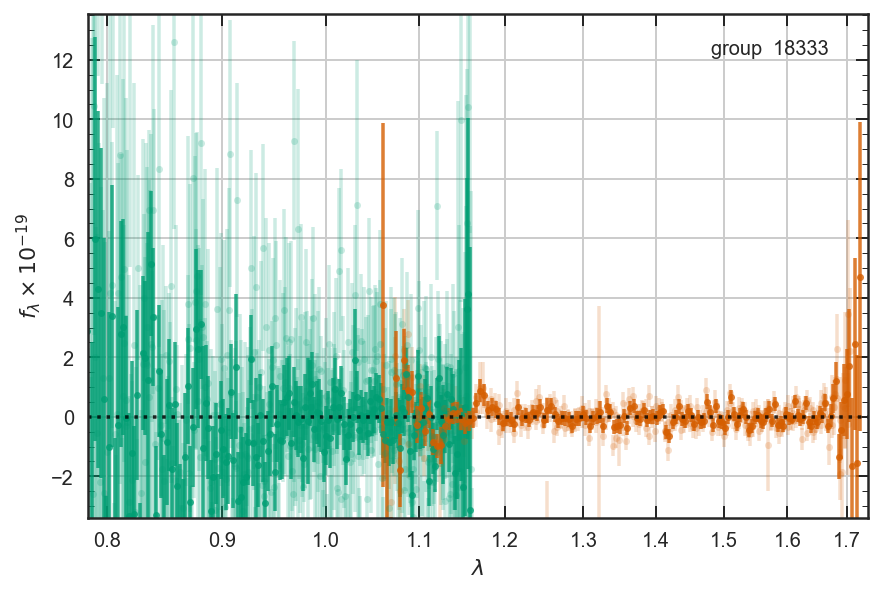

In [25]:
mb.oned_figure()